# 3 - Introduction to Scikit-learn [45min]

## Learning objectives

- Concepts:
    
    + Models
    + Clustering, Classification, Regression
    + Fit, Predict, Evaluate
    + Accuracy, confusion matrix
    + Overfitting, training/test data, and crossvalidation
    
- sklearn API:
    
    + model.fit()
    + model.predict()
    + accuracy_score()
    + confusion_matrix()
    + train_test_split()
    + cross_val_score()

## What is a model? 

In [1]:
from IPython.display import Image

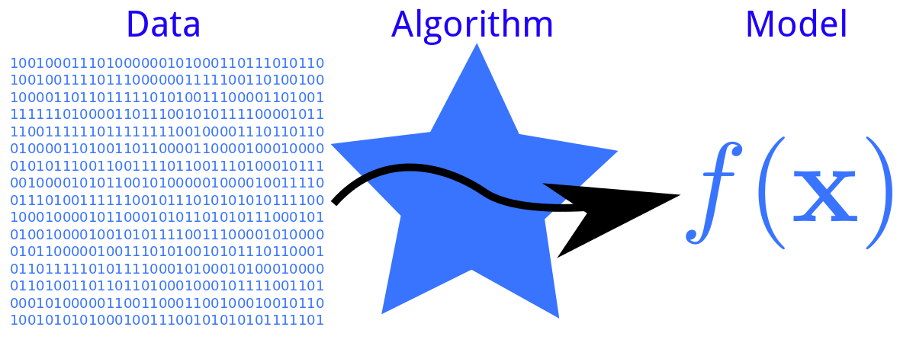

In [2]:
Image("images/ml-model.png", width=500)

http://phdp.github.io/posts/2013-07-05-dtl.html

## What kind of algorithms do we have?

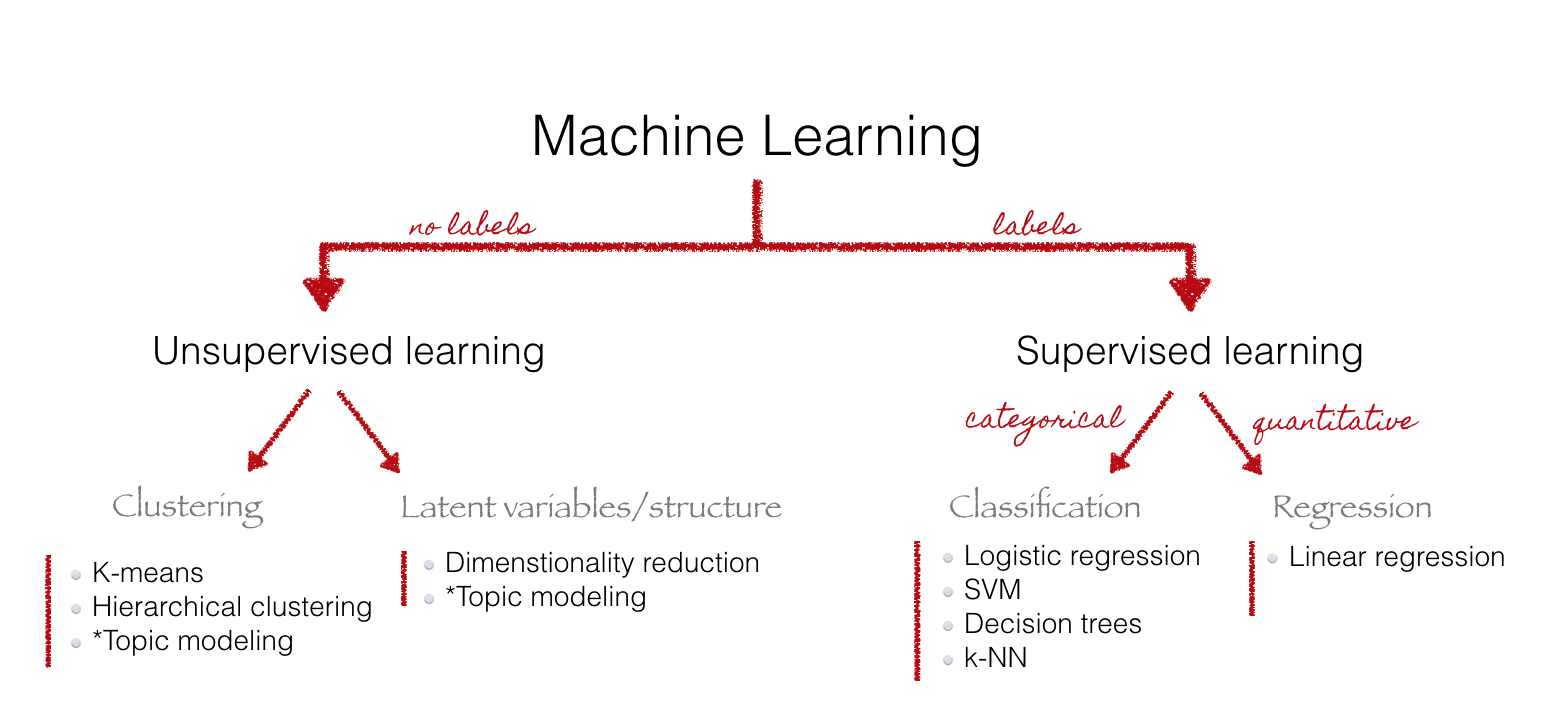

In [3]:
Image("images/ml-1.png", width=800)

## Three step modeling process: fit, predict and evaluate (metrics)

### - Clustering

#### Data

In [4]:
from sklearn.datasets import make_blobs

In [5]:
X, y = make_blobs()

#### Algorithm

In [6]:
from sklearn.cluster import KMeans

In [7]:
kmeans = KMeans(n_clusters=3)

#### Fit

In [8]:
kmeans.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

#### Predict

In [9]:
kmeans.predict(X)

array([2, 2, 1, 1, 1, 2, 0, 1, 0, 0, 2, 1, 0, 0, 2, 2, 2, 1, 2, 1, 0, 0, 2,
       0, 2, 0, 0, 1, 1, 2, 0, 2, 1, 0, 0, 0, 1, 1, 2, 0, 1, 1, 1, 0, 2, 1,
       2, 2, 0, 2, 2, 1, 2, 2, 0, 0, 2, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 2, 2,
       2, 1, 0, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 1, 0, 1, 2, 2, 0, 0, 0, 1, 1,
       0, 2, 2, 2, 2, 1, 2, 2], dtype=int32)

In [10]:
cluster_labels = kmeans.predict(X)

#### Evaluate

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [12]:
accuracy_score(y, cluster_labels)

0.33000000000000002

In [13]:
confusion_matrix(y, cluster_labels)

array([[ 0, 34,  0],
       [33,  0,  0],
       [ 0,  0, 33]])

We need to adjust the score, because it groups them correctly, it is just the random naming of each group that is different

In [14]:
from sklearn.metrics import adjusted_rand_score

In [15]:
adjusted_rand_score(y, cluster_labels)

1.0

### Accuracy

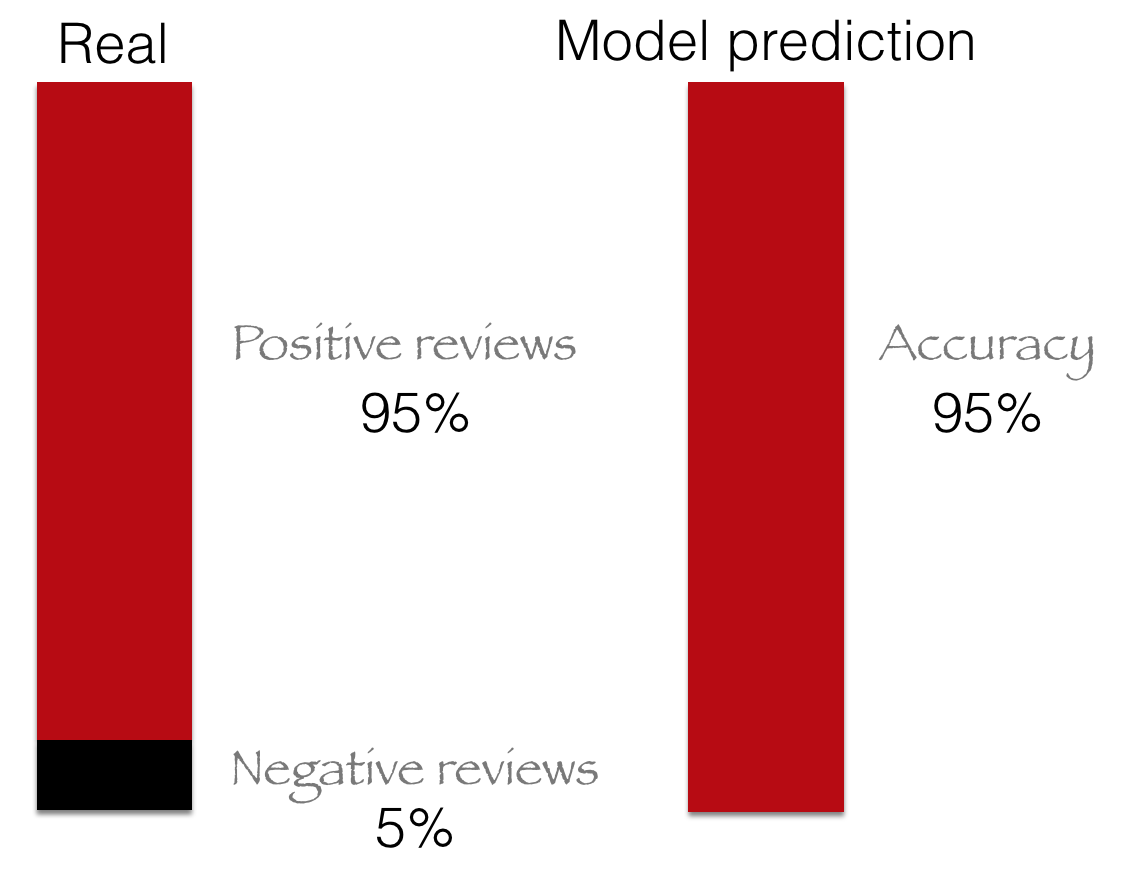

In [16]:
Image("images/accuracy.png", width=300)

### Confusion matrix

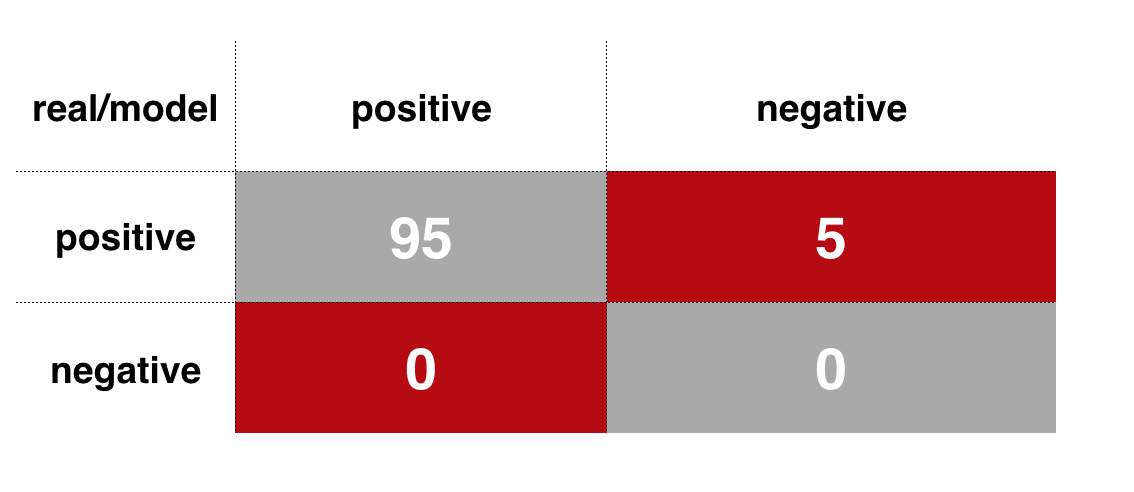

In [17]:
Image("images/confusion.png", width=300)

## EXERCISE: Fit, predict and evaluate the iris data set using any classifier, change the parameters of the classifier or the classifier and compare the metrics

#### Data 

In [18]:
from sklearn.datasets import load_iris

In [19]:
iris = load_iris()
X = iris.data
y = iris.target

#### EXERCISE: Pick a classifier algorithm 

In [20]:
#from sklearn.svm import SVC

In [21]:
#from sklearn.naive_bayes import GaussianNB

Other classification algorithms: http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#example-classification-plot-classifier-comparison-py

#### EXERCISE: Fit the model

In [23]:
# Your code here

#### EXERCISE: Predict the model

In [24]:
# Your code here

#### EXERCISE: Evaluate the model

In [25]:
# Your code here

## Evaluating models

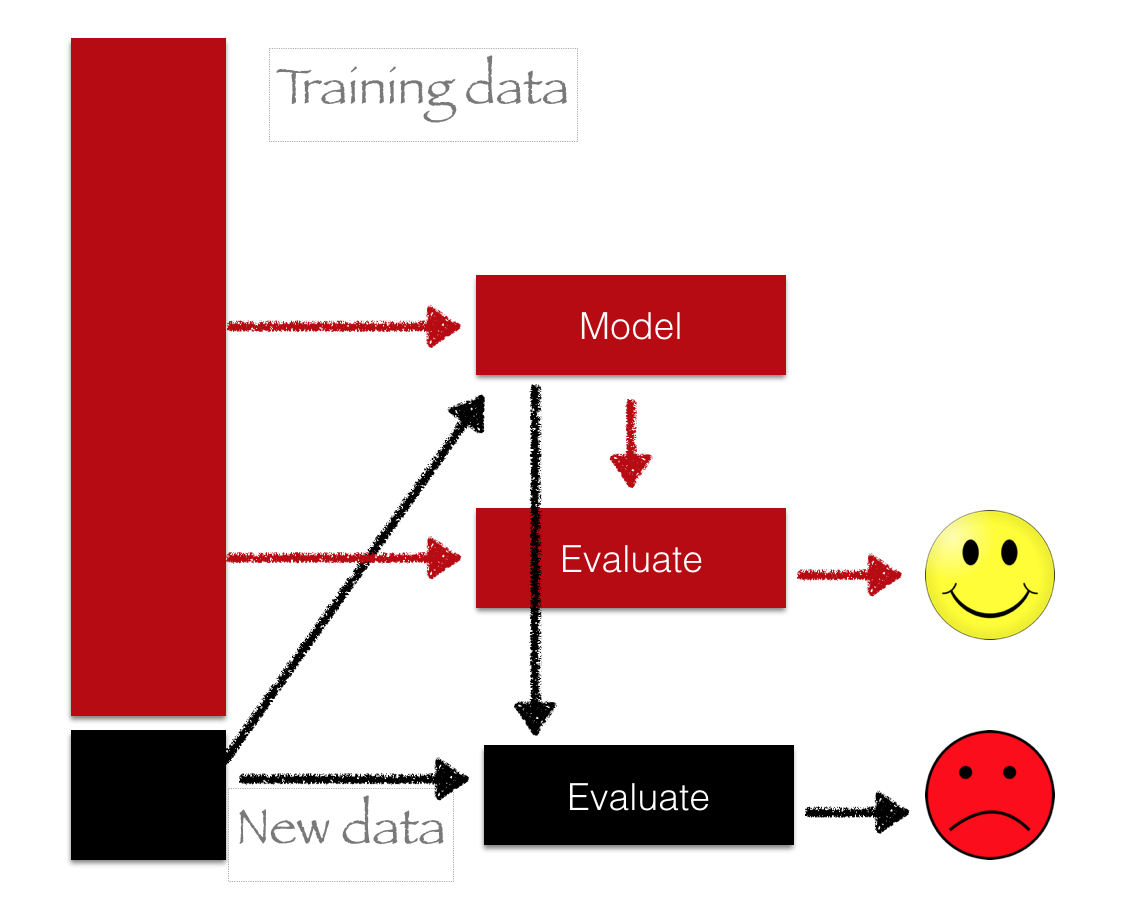

In [26]:
Image("images/training-data.png", width=500)

In [28]:
from sklearn.cross_validation import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4)

We fit with the training data and we evaluate with the test data!

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
model = KNeighborsClassifier()

In [33]:
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [35]:
model.score(X_train, y_train)

0.9555555555555556

In [34]:
model.score(X_test, y_test)

0.98333333333333328

## Crossvalidation

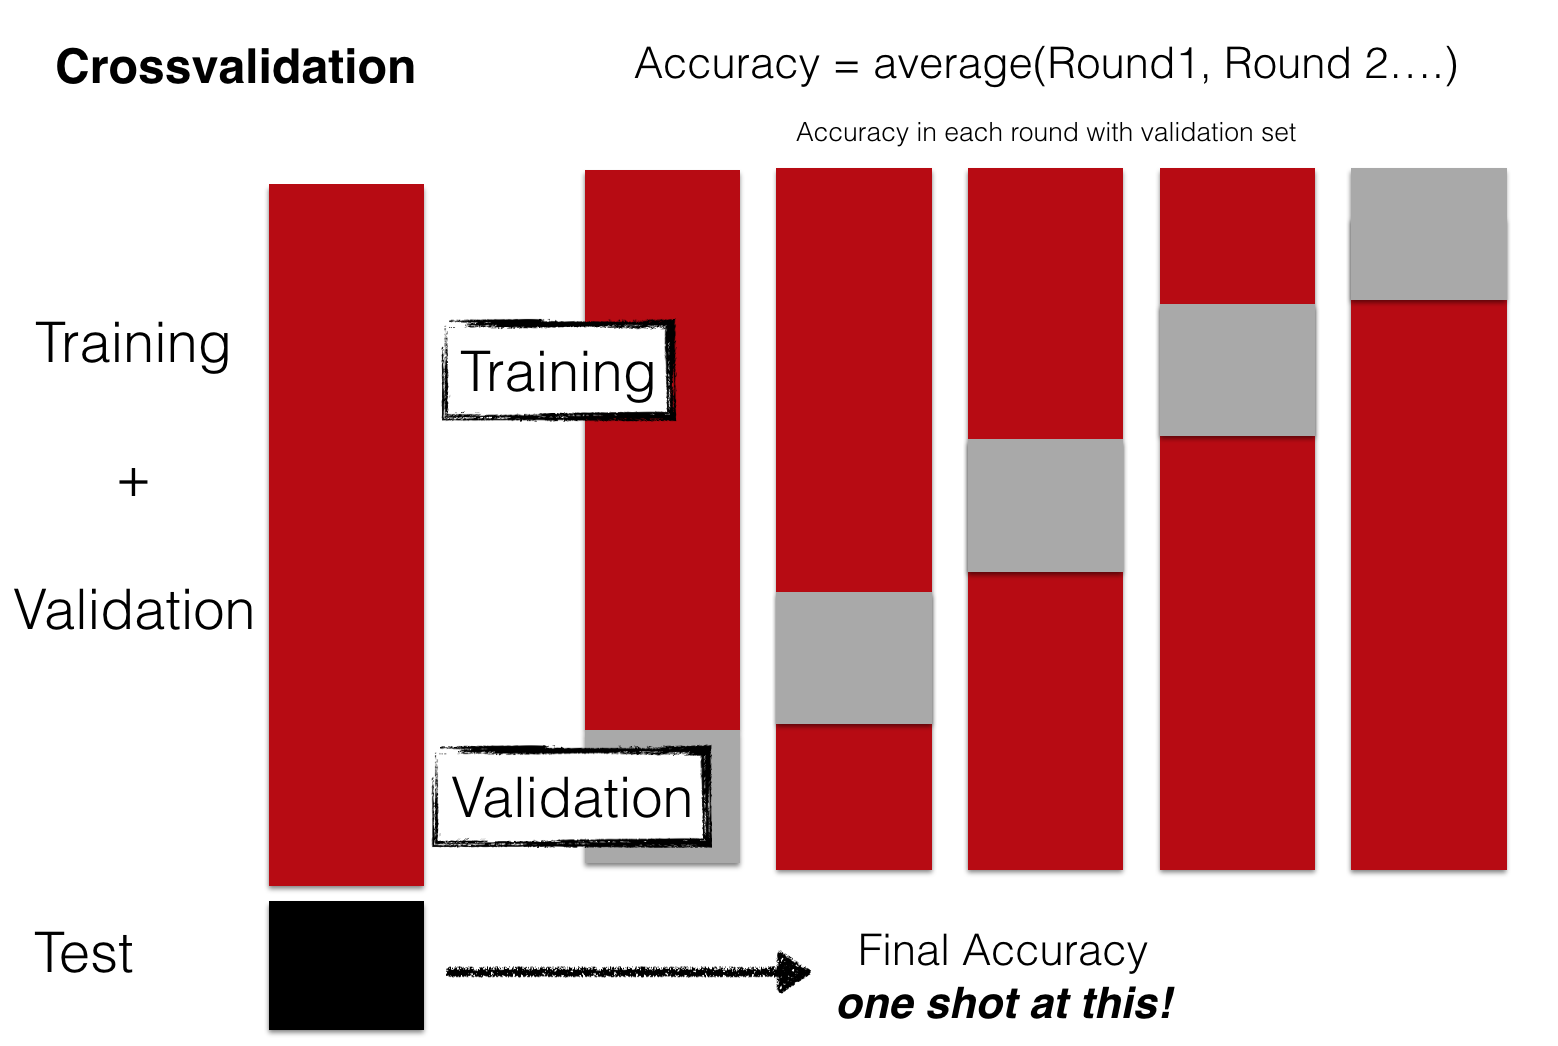

In [29]:
Image("images/crossvalidation.png", width=500)

In [36]:
from sklearn.cross_validation import cross_val_score

In [38]:
cross_val_score(model, X, y, cv=5)

array([ 0.96666667,  1.        ,  0.93333333,  0.96666667,  1.        ])

### EXERCISE: Fit/predict/evaluate your previous model using training and testing data, and crossvalidation